In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

## RESULTS USING THE SIGNAL OF TRUNCATE

In [2]:
env='Swimmer-v4'
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data_using_truncate/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER"
print(df_comper.shape)

(1250, 17)


In [3]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data_using_truncate/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
print(df_ddpg.shape)

(1250, 17)


In [4]:
df_comper.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Swimmer-v4,25-07-2023 16:11:22,200,0,196,0.009941,1,201,False,-15.527233,-15.527233,-15.527233,-15.527233,-15.527233,COMPER
1,1,2,Swimmer-v4,25-07-2023 16:16:35,400,0,382,0.019882,1,401,False,19.979750,2.226259,2.226259,2.226259,2.226259,COMPER
2,1,3,Swimmer-v4,25-07-2023 16:21:46,600,0,499,0.029822,1,601,False,20.000463,8.150993,8.150993,8.150993,8.150993,COMPER
3,1,4,Swimmer-v4,25-07-2023 16:26:45,800,0,555,0.039763,1,801,False,18.988127,10.860277,10.860277,10.860277,10.860277,COMPER
4,1,5,Swimmer-v4,25-07-2023 16:31:42,1000,0,596,0.049704,1,1001,True,17.913481,12.270918,12.270918,12.270918,12.270918,COMPER


In [5]:
df_ddpg.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Swimmer-v4,17-07-2023 21:21:21,200,200,0,0.009941,1,201,False,25.174118,25.174118,25.174118,25.174118,25.174118,DDPG
1,1,2,Swimmer-v4,17-07-2023 21:21:40,400,277,0,0.019882,1,401,False,26.075698,25.624908,25.624908,25.624908,25.624908,DDPG
2,1,3,Swimmer-v4,17-07-2023 21:21:58,600,306,0,0.029822,1,601,False,24.393589,25.214469,25.214469,25.214469,25.214469,DDPG
3,1,4,Swimmer-v4,17-07-2023 21:22:17,800,324,0,0.039763,1,801,False,22.733547,24.594238,24.594238,24.594238,24.594238,DDPG
4,1,5,Swimmer-v4,17-07-2023 21:22:35,1000,348,0,0.049704,1,1001,True,21.281906,23.931772,23.931772,23.931772,23.931772,DDPG


In [6]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Swimmer-v4,25-07-2023 16:11:22,200,0,196,0.009941,1,201,False,-15.527233,-15.527233,-15.527233,-15.527233,-15.527233,COMPER
1,1,2,Swimmer-v4,25-07-2023 16:16:35,400,0,382,0.019882,1,401,False,19.979750,2.226259,2.226259,2.226259,2.226259,COMPER
2,1,3,Swimmer-v4,25-07-2023 16:21:46,600,0,499,0.029822,1,601,False,20.000463,8.150993,8.150993,8.150993,8.150993,COMPER
3,1,4,Swimmer-v4,25-07-2023 16:26:45,800,0,555,0.039763,1,801,False,18.988127,10.860277,10.860277,10.860277,10.860277,COMPER
4,1,5,Swimmer-v4,25-07-2023 16:31:42,1000,0,596,0.049704,1,1001,True,17.913481,12.270918,12.270918,12.270918,12.270918,COMPER


In [7]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
245,5,246,Swimmer-v4,18-07-2023 04:22:24,49200,43116,0,0.999,50,201,False,33.272327,23.332955,27.551009,28.420322,34.404541,DDPG
246,5,247,Swimmer-v4,18-07-2023 04:22:46,49400,43316,0,0.999,50,401,False,41.337507,23.405848,27.567944,29.172530,35.111848,DDPG
247,5,248,Swimmer-v4,18-07-2023 04:23:09,49600,43516,0,0.999,50,601,False,36.689040,23.459409,27.511930,29.821344,35.270301,DDPG
248,5,249,Swimmer-v4,18-07-2023 04:23:32,49800,43716,0,0.999,50,801,False,41.776398,23.532972,27.533534,30.529962,35.984719,DDPG
249,5,250,Swimmer-v4,18-07-2023 04:23:55,50000,43916,0,0.999,50,1001,True,38.644921,23.593419,27.456147,31.104637,36.210562,DDPG


<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

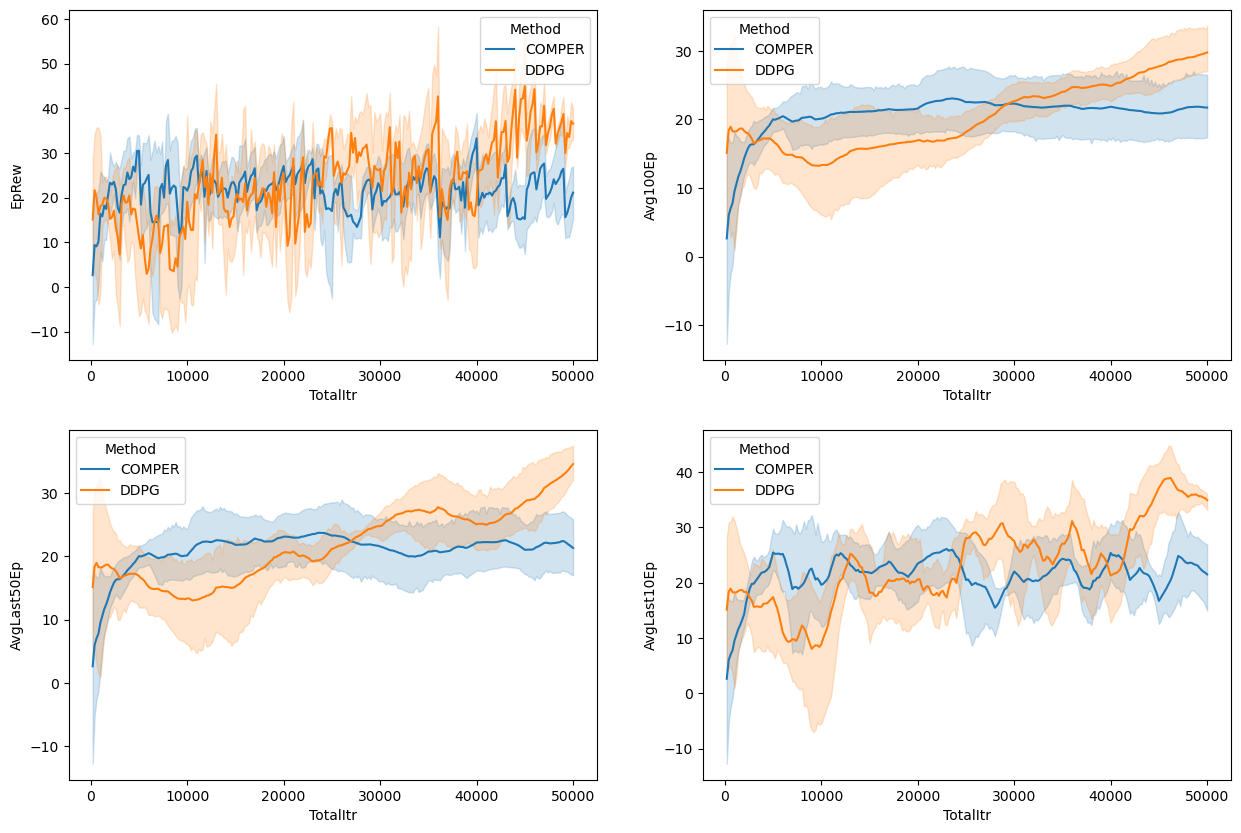

In [8]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])

In [9]:
path ='COMPER_DDPG/data/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMPER"
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,25-07-2023 18:15:02,Swimmer-v4,5000,1.404653,COMPER
1,1,25-07-2023 20:25:27,Swimmer-v4,10000,1.725064,COMPER
2,1,25-07-2023 22:37:07,Swimmer-v4,15000,1.612634,COMPER
3,1,26-07-2023 00:48:35,Swimmer-v4,20000,1.450122,COMPER
4,1,26-07-2023 03:00:36,Swimmer-v4,25000,2.345842,COMPER


In [10]:
path ='DPPG/data/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,17-07-2023 21:28:35,Swimmer-v4,5000,1.570438,DDPG
1,1,17-07-2023 21:36:17,Swimmer-v4,10000,-0.617055,DDPG
2,1,17-07-2023 21:44:09,Swimmer-v4,15000,0.659451,DDPG
3,1,17-07-2023 21:52:06,Swimmer-v4,20000,1.466822,DDPG
4,1,17-07-2023 22:00:22,Swimmer-v4,25000,1.283119,DDPG


In [11]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,0.877826
std,1.428571,14507.211437,0.890019
min,1.000000,5000.000000,-0.822081
25%,2.000000,15000.000000,0.354994
50%,3.000000,27500.000000,1.004301
75%,4.000000,40000.000000,1.364901
max,5.000000,50000.000000,2.834939


In [12]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

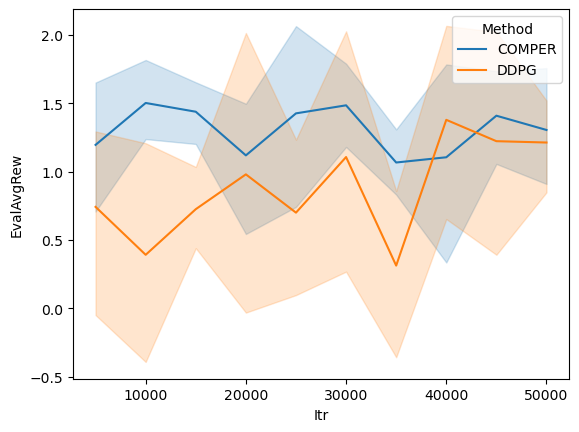

In [13]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')

## USING ROLLING AVERAGE

In [14]:
df_comper_rolling_avg = pd.DataFrame(df_comper[["TotalItr","EpRew","Method"]])
df_comper_rolling_avg["EpRewRolling"]=df_comper_rolling_avg['EpRew'].rolling(100).mean()
df_comper_rolling_avg.dropna(inplace=True)
df_comper_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,20000,38.408947,COMPER,25.402787
100,20200,27.486209,COMPER,25.832922
101,20400,27.538734,COMPER,25.908511
102,20600,27.499441,COMPER,25.983501
103,20800,29.997424,COMPER,26.093594


In [15]:
df_ddpg_rolling_avg=pd.DataFrame(df_ddpg[["TotalItr","EpRew","Method"]])
df_ddpg_rolling_avg["EpRewRolling"]=df_ddpg_rolling_avg["EpRew"].rolling(100).mean()
df_ddpg_rolling_avg.dropna(inplace=True)
df_ddpg_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,20000,24.845218,DDPG,14.541524
100,20200,14.125465,DDPG,14.431038
101,20400,16.303314,DDPG,14.333314
102,20600,21.086080,DDPG,14.300239
103,20800,24.197936,DDPG,14.314883


In [16]:
df_rolling=pd.concat([df_comper_rolling_avg,df_ddpg_rolling_avg])
df_rolling.head()

,TotalItr,EpRew,Method,EpRewRolling
99,20000,38.408947,COMPER,25.402787
100,20200,27.486209,COMPER,25.832922
101,20400,27.538734,COMPER,25.908511
102,20600,27.499441,COMPER,25.983501
103,20800,29.997424,COMPER,26.093594


In [17]:
df_rolling.tail()

,TotalItr,EpRew,Method,EpRewRolling
245,49200,33.272327,DDPG,27.551009
246,49400,41.337507,DDPG,27.567944
247,49600,36.689040,DDPG,27.511930
248,49800,41.776398,DDPG,27.533534
249,50000,38.644921,DDPG,27.456147


<Axes: xlabel='TotalItr', ylabel='EpRewRolling'>

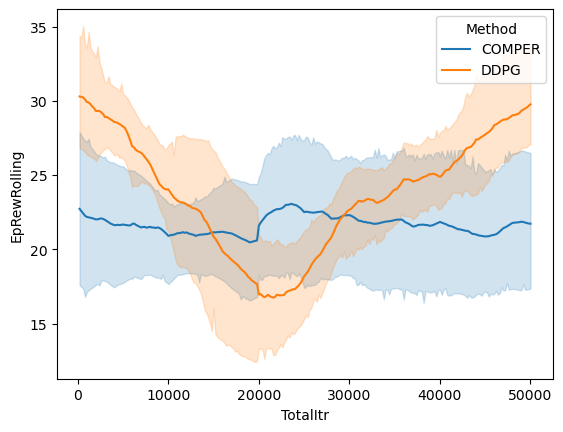

In [18]:
fig = plt.Figure()
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df_rolling, x="TotalItr", y="EpRewRolling",hue='Method')

In [19]:
df_comper_eval_rolling_avg = pd.DataFrame(df_comper_eval[["Int","EvalAvgRew","Method"]])
df_comper_eval_rolling_avg["EpRewRolling"]=df_comper_eval["EvalAvgRew"].rolling(2).mean()
df_comper_eval_rolling_avg.dropna(inplace=True)
df_comper_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,1.725064,COMPER,1.564858
2,15000,1.612634,COMPER,1.668849
3,20000,1.450122,COMPER,1.531378
4,25000,2.345842,COMPER,1.897982
5,30000,1.478895,COMPER,1.912369


In [20]:
df_ddpg_eval_rolling_avg = pd.DataFrame(df_ddpg_eval[["Int","EvalAvgRew","Method"]])
df_ddpg_eval_rolling_avg["EpRewRolling"]=df_ddpg_eval["EvalAvgRew"].rolling(2).mean()
df_ddpg_eval_rolling_avg.dropna(inplace=True)
df_ddpg_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,-0.617055,DDPG,0.476691
2,15000,0.659451,DDPG,0.021198
3,20000,1.466822,DDPG,1.063137
4,25000,1.283119,DDPG,1.374971
5,30000,0.115016,DDPG,0.699067


<Axes: xlabel='Int', ylabel='EpRewRolling'>

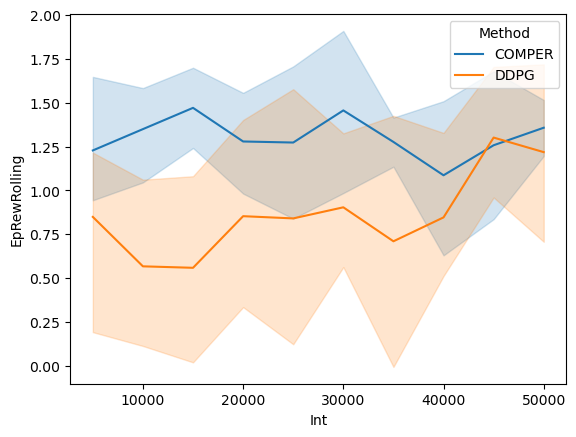

In [21]:
df_eval_rolling=pd.concat([df_comper_eval_rolling_avg,df_ddpg_eval_rolling_avg])
sns.lineplot(data=df_eval_rolling, x="Int", y="EpRewRolling",hue='Method')